In [227]:
import geopandas as gpd
from shapely.geometry import Polygon
import json
import pandas as pd
file_path = "dunya-sehirleri.geojson"
# gdf_origin = gpd.read_file(file_path)

# print(gdf.head())


In [228]:
gdf = gdf_origin.copy()

In [229]:
gdf.head()

,cont_name,name,synonyms,geometry
0,South America,Entre Ros,Entre Ríos eyaleti|Entre Rios|Argentina|SA|Sou...,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4..."
1,South America,Paysand,"Uruguay|Paysandu, Departamento de|Paysandu Dep...","POLYGON ((-58.20012 -32.44720, -58.19742 -32.4..."
2,Asia,Kalimantan Timur,AS|Indonesia|world|East Kalimantan|Kalimantan ...,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
3,Asia,Sabah,"AS|Sabah, State of|Sabah|world|Asia|Malaysia","MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,South America,Arica y Parinacota,Arica y Parinacota|SA|South America|world|Aric...,"POLYGON ((-69.51009 -17.50659, -69.63832 -17.6..."


In [230]:
# gdf['cont_name']

In [231]:
# gdf['synonyms'][gdf['synonyms'].str.lower().str.contains('kuwait')].values
# gdf['synonyms'][gdf['synonyms'].str.lower().str.contains('qatar')].values
# gdf['synonyms'][gdf['synonyms'].str.lower().str.contains('emirates')].values
# gdf['synonyms'][gdf['synonyms'].str.lower().str.contains('oman\|')]
# gdf['synonyms'][gdf['synonyms'].str.lower().str.contains('bahrain')].values
# gdf['synonyms'][gdf['synonyms'].str.lower().str.contains('\|india\|')]
gdf['synonyms'][(gdf['synonyms'].str.lower().str.contains('saudi')) & ~(gdf['synonyms'].str.lower().str.contains('makkah'))].values

array(['AS|Al Hudud ash Shamaliyah|Hudud ash Shamaliyah, Mintaqat al|Saudi Arabia|world|Northern Borders|Kuzey Sınır Bölgesi|Asia',
       'AS|Saudi Arabia|Najran|world|Najran, Mintaqat|Necran Bölgesi|Asia',
       "AS|Asir|Saudi Arabia|world|Asir Bölgesi|`Asir|'Asir|`Asir, Mintaqat|Asia",
       'AS|Jazan|Cizan Bölgesi|Saudi Arabia|world|Jizan|Asia|Jizan, Mintaqat',
       'AS|Saudi Arabia|world|Tabuk, Mintaqat|Tebük Bölgesi|Tabuk|Asia',
       'AS|Saudi Arabia|world|Medine Bölgesi|Madinah, Mintaqat al|Asia|Al Madinah',
       'AS|Riyad, Mintaqat ar|Asia|Saudi Arabia|world|Ar Riyad|Riyadh|Riyad Bölgesi',
       'El Kasım Bölgesi|AS|Asia|Saudi Arabia|world|Al-Qassim|Al Quassim|Qasim, Mintaqat al',
       "AS|Ha'il|Saudi Arabia|Hail Bölgesi|world|Ha'il, Mintaqat|Hail|Asia",
       'AS|Al-Baha|Saudi Arabia|world|El Baha Bölgesi|Bahah, Mintaqat al|Al Bahah|Asia'],
      dtype=object)

# Jeddah Ekle

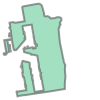

In [232]:
jeddah_synonyms = 'AS|Mintaqat|Mekke Bölgesi|Saudi Arabia|world|Jeddah|Asia'
jeddah_cont_name = 'Asia'
jeddah_name = 'Jeddah'


with open('districts.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    
df = pd.DataFrame(data)
jeddah = df[df['name_en'].str.lower().str.contains('jeddah')]
jeddah = jeddah['boundaries'].values[0][0]

for i in range(len(jeddah)):
    jeddah[i][0], jeddah[i][1] = jeddah[i][1], jeddah[i][0]

polygon  = Polygon(jeddah) 
polygon

In [233]:
jeddah_polygon = gpd.GeoDataFrame(geometry=[polygon], crs="EPSG:4326")
jeddah_polygon['geometry'] = jeddah_polygon['geometry'].to_crs("EPSG:4326")

jeddah_polygon.insert(0,'cont_name',jeddah_cont_name)
jeddah_polygon.insert(1,'name',jeddah_name)
jeddah_polygon.insert(2,'synonyms',jeddah_synonyms)
jeddah_polygon

,cont_name,name,synonyms,geometry
0,Asia,Jeddah,AS|Mintaqat|Mekke Bölgesi|Saudi Arabia|world|J...,"POLYGON ((39.16910 21.48665, 39.16922 21.48663..."


In [234]:
# Polygon(gdf['geometry'].values[0]) 

In [235]:
gdf['geometry'] = gdf['geometry'].to_crs("EPSG:4326")
gdf = pd.concat([gdf, jeddah_polygon], ignore_index=False)
gdf = gdf.reset_index(drop=True)
gdf

,cont_name,name,synonyms,geometry
0,South America,Entre Ros,Entre Ríos eyaleti|Entre Rios|Argentina|SA|Sou...,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4..."
1,South America,Paysand,"Uruguay|Paysandu, Departamento de|Paysandu Dep...","POLYGON ((-58.20012 -32.44720, -58.19742 -32.4..."
2,Asia,Kalimantan Timur,AS|Indonesia|world|East Kalimantan|Kalimantan ...,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
3,Asia,Sabah,"AS|Sabah, State of|Sabah|world|Asia|Malaysia","MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,South America,Arica y Parinacota,Arica y Parinacota|SA|South America|world|Aric...,"POLYGON ((-69.51009 -17.50659, -69.63832 -17.6..."
...,...,...,...,...
4592,Europe,Cospicua,Europe|EU|world|Bormla|Cospicua|Malta,"POLYGON ((14.52937 35.88156, 14.52126 35.88711..."
4593,Europe,Piet,Europe|EU|Piet|world|Pietà|Tal-Pieta|Malta,"POLYGON ((14.49801 35.89251, 14.49327 35.89162..."
4594,Europe,Msida,Europe|EU|L-Imsida|world|Msida|Malta,"POLYGON ((14.48663 35.88636, 14.48916 35.88889..."
4595,Europe,Birgu,Il-Birgu|Europe|EU|Birgu|world|Malta,"POLYGON ((14.52126 35.88711, 14.52937 35.88156..."


In [242]:
# Her bir koşulu ayrı ayrı tanımlayarak kodun okunabilirliğini artırabilirsiniz.
condition_saudi = gdf['synonyms'].str.lower().str.contains('saudi')
# condition_saudi = ((gdf['synonyms'].str.lower().str.contains('saudi')) & ~(gdf['synonyms'].str.lower().str.contains('makkah')))
condition_kuwait = gdf['synonyms'].str.lower().str.contains('kuwait')
condition_qatar = gdf['synonyms'].str.lower().str.contains('qatar')
condition_emirates = gdf['synonyms'].str.lower().str.contains('emirates')
condition_oman = gdf['synonyms'].str.lower().str.contains('oman\|')
condition_bahrain = gdf['synonyms'].str.lower().str.contains('bahrain')
condition_india = gdf['synonyms'].str.lower().str.contains('\|india\|')

# Tüm koşulları tek bir boolean mask altında birleştirin.
all_conditions = (
    condition_saudi |
    condition_kuwait |
    condition_qatar |
    condition_emirates |
    condition_oman |
    condition_bahrain |
    condition_india 
)

arabs_indians = gdf[all_conditions].reset_index(drop= True)
arabs_indians

,cont_name,name,synonyms,geometry
0,Asia,Ladakh,Ladakh|AS|world|India|Asia,"POLYGON ((77.80035 35.49541, 77.42466 35.30292..."
1,Asia,Arunachal Pradesh,"AS|Arunaçhal Pradesh|world|Arunachal Pradesh, ...","POLYGON ((97.32350 28.21748, 97.28526 28.23567..."
2,Asia,Fujayrah,AS|Emirate of Fujairah|Füceyre|world|Al Fujayr...,"MULTIPOLYGON (((56.34912 25.29402, 56.34438 25..."
3,Asia,Musandam,AS|Musandam|Musandam valiliği|Oman|world|Asia,"MULTIPOLYGON (((56.34912 25.29402, 56.30937 25..."
4,Asia,Sharjah,AS|Emirate of Sharjah|Ash Shariqah|Sharjah|wor...,"MULTIPOLYGON (((56.34912 25.29402, 56.35628 25..."
...,...,...,...,...
83,Europe,Rosoman,"Europe|Rosoman|EU|Rosoman, Opstina|world|Maced...","POLYGON ((21.80976 41.45654, 21.81555 41.44982..."
84,Asia,Chhattisgarh,"AS|Asia|world|Chhattisgarh|India|Chhattisgarh,...","POLYGON ((83.33706 24.14023, 83.32621 24.12447..."
85,Asia,Haryana,"AS|world|Haryana, State of|Haryana|India|Asia","POLYGON ((77.58506 30.38293, 77.58382 30.38218..."
86,Asia,Telangana,AS|world|Telangana|India|Asia,"POLYGON ((77.55116 18.30788, 77.58331 18.29155..."


In [244]:
arabs_indians[['name','geometry']][arabs_indians['synonyms'].str.lower().str.contains('saudi')]

,name,geometry
24,Al Hudud ash Shamaliyah,"POLYGON ((42.78341 30.55105, 42.76393 30.56563..."
28,Najran,"POLYGON ((47.42857 17.09310, 47.42866 17.09381..."
29,Asir,"POLYGON ((43.63845 17.43851, 43.63866 17.46984..."
30,Jizan,"MULTIPOLYGON (((43.18568 16.68485, 43.17977 16..."
40,Tabuk,"MULTIPOLYGON (((37.38282 24.53957, 37.38498 24..."
41,Al Madinah,"POLYGON ((38.64384 23.41947, 38.67457 23.42289..."
42,Makkah,"POLYGON ((41.59714 18.12113, 41.59729 18.12135..."
76,Ar Riyad,"POLYGON ((44.62759 27.22237, 44.69229 27.19676..."
77,Al Quassim,"POLYGON ((44.62759 27.22237, 44.58615 27.18800..."
78,Hail,"POLYGON ((41.40980 25.53650, 41.44856 25.56857..."


In [243]:
output_file = 'arabs_and_indians_v2.geojson'
arabs_indians.to_file(output_file, driver="GeoJSON")

In [ ]:
# file_path = "cities.geojson"
# gdf2 = gpd.read_file(file_path)
# gdf2[gdf2['name_en'].str.lower().str.contains('jedd')]['geometry']

17    POINT (39.18095 21.48818)
Name: geometry, dtype: geometry

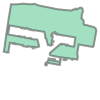

In [ ]:

# jeddah

,geometry
0,"POLYGON ((21.48665 39.16910, 21.48663 39.16922..."
